In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
datContent = [i.strip().split() for i in open("HIP2008_SpT_Mv_75pc_plxSN8.dat.txt").readlines()]

data = datContent[14:]
v1_2 = float(data[0][1])


In [3]:
BV = []
eBV = []
Mv = []

for i in range(len(data)):
    BV.append(float(data[i][11]))
    eBV.append(float(data[i][12])/2)
    Mv.append(float(data[i][14]))

Lum = [(3.0128e28)*(10**(-0.4*Mv[i])) for i in range(len(data))]
lsz = [(Lum[i]/6.0e25) for i in range(len(data))]

Temp = [4600 * (1 / (0.92 * BV[i] + 1.7) + 1 / (0.92 * BV[i] + 0.62)) for i in range(len(data))]

Rad = [((Lum[i]/(4*np.pi*5.67e-8))**0.5)/(Temp[i]**2) for i in range(len(data))]
rsz = [Rad[i]/4.0e7 for i in range(len(data))]


In [4]:
import numpy as np

redco = [ 1.62098281e-82, -5.03110845e-77, 6.66758278e-72, -4.71441850e-67, 1.66429493e-62, -1.50701672e-59, -2.42533006e-53, 8.42586475e-49, 7.94816523e-45, -1.68655179e-39, 7.25404556e-35, -1.85559350e-30, 3.23793430e-26, -4.00670131e-22, 3.53445102e-18, -2.19200432e-14, 9.27939743e-11, -2.56131914e-07,  4.29917840e-04, -3.88866019e-01, 3.97307766e+02]
greenco = [ 1.21775217e-82, -3.79265302e-77, 5.04300808e-72, -3.57741292e-67, 1.26763387e-62, -1.28724846e-59, -1.84618419e-53, 6.43113038e-49, 6.05135293e-45, -1.28642374e-39, 5.52273817e-35, -1.40682723e-30, 2.43659251e-26, -2.97762151e-22, 2.57295370e-18, -1.54137817e-14, 6.14141996e-11, -1.50922703e-07,  1.90667190e-04, -1.23973583e-02,-1.33464366e+01]
blueco = [ 2.17374683e-82, -6.82574350e-77, 9.17262316e-72, -6.60390151e-67, 2.40324203e-62, -5.77694976e-59, -3.42234361e-53, 1.26662864e-48, 8.75794575e-45, -2.45089758e-39, 1.10698770e-34, -2.95752654e-30, 5.41656027e-26, -7.10396545e-22, 6.74083578e-18, -4.59335728e-14, 2.20051751e-10, -7.14068799e-07,  1.46622559e-03, -1.60740964e+00, 6.85200095e+02]

redco = np.poly1d(redco)
greenco = np.poly1d(greenco)
blueco = np.poly1d(blueco)

def temp2rgb(temp):

    red = redco(temp)
    green = greenco(temp)
    blue = blueco(temp)

    if red > 255:
        red = 255
    elif red < 0:
        red = 0
    if green > 255:
        green = 255
    elif green < 0:
        green = 0
    if blue > 255:
        blue = 255
    elif blue < 0:
        blue = 0

    color = (int(red)/255,
             int(green)/255,
             int(blue)/255)
    return color

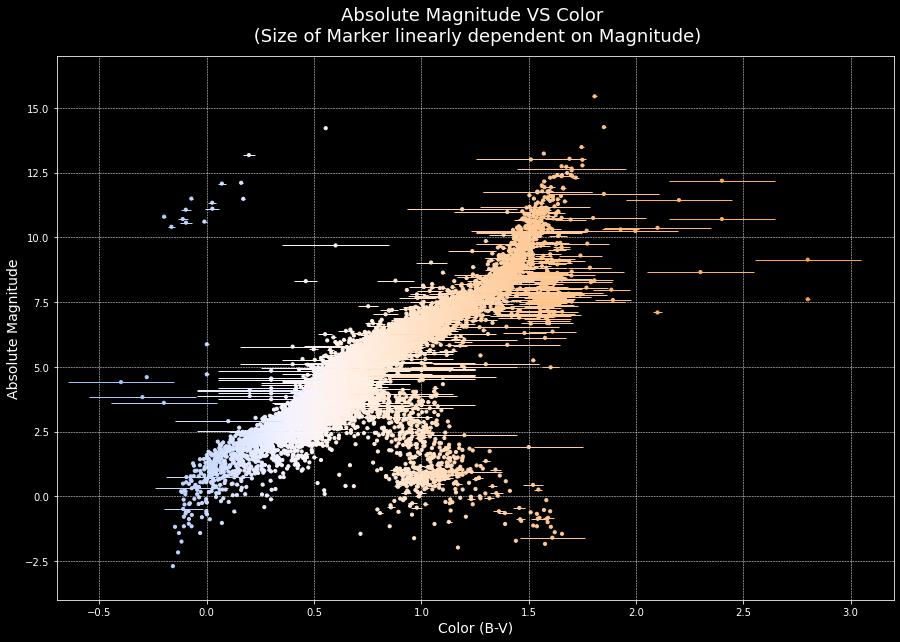

In [5]:
plt.figure(figsize=(15,10), facecolor='Black')
plt.style.use(['dark_background'])
clr = []
for i in range(len(data)):
    clr.append(temp2rgb(Temp[i]))
plt.scatter(BV, Mv, s=10,c=clr)
plt.errorbar(BV, Mv, xerr=eBV, ecolor=clr, ls='', elinewidth=1)
plt.xlim(-0.7,3.2)
plt.ylim(-4.0,17.0)
plt.xlabel('Color (B-V)', {'fontsize': 14})
plt.ylabel('Absolute Magnitude', {'fontsize': 14})
plt.title('Absolute Magnitude VS Color \n (Size of Marker linearly dependent on Magnitude)', {'fontsize': 18}, pad=15)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

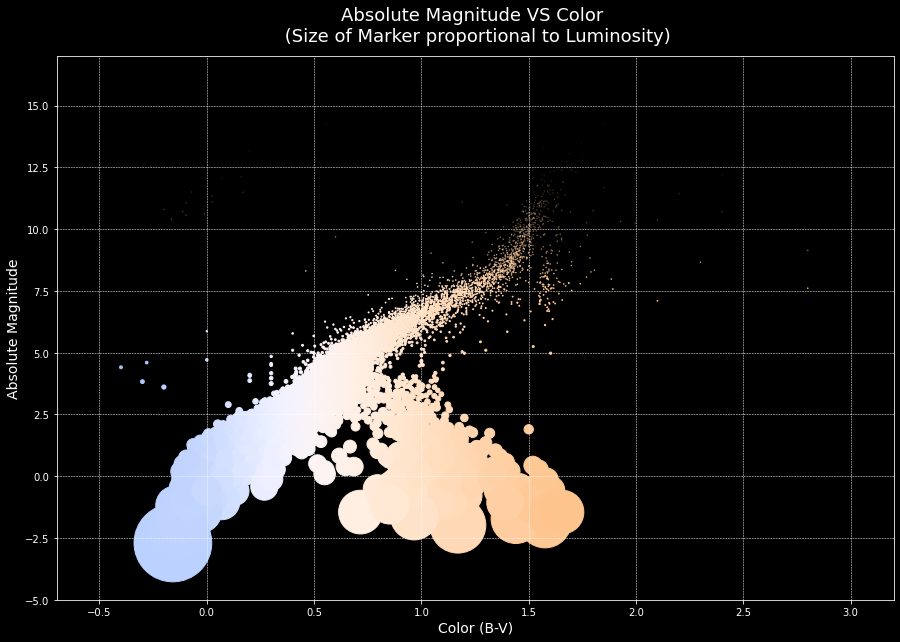

In [6]:
plt.figure(figsize=(15,10), facecolor='Black')
plt.style.use(['dark_background'])
clr = []
for i in range(len(data)):
    clr.append(temp2rgb(Temp[i]))
plt.scatter(BV, Mv, s=lsz,c=clr)
plt.xlim(-0.7,3.2)
plt.ylim(-5.0,17.0)
plt.xlabel('Color (B-V)', {'fontsize': 14})
plt.ylabel('Absolute Magnitude', {'fontsize': 14})
plt.title('Absolute Magnitude VS Color \n (Size of Marker proportional to Luminosity)', {'fontsize': 18}, pad=15)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

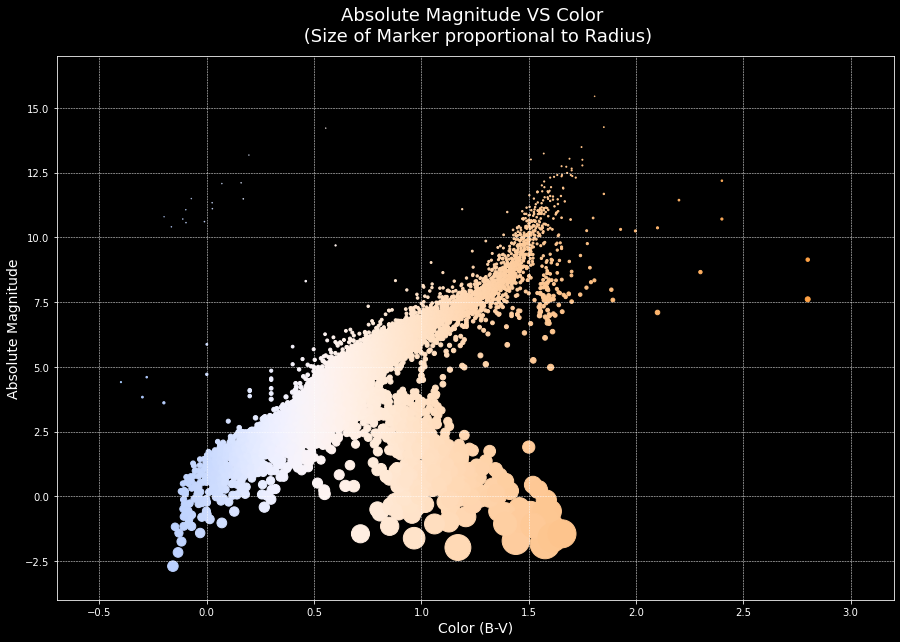

In [7]:
plt.figure(figsize=(15,10), facecolor='Black')
plt.style.use(['dark_background'])
clr = []
for i in range(len(data)):
    clr.append(temp2rgb(Temp[i]))
plt.scatter(BV, Mv, s=rsz,c=clr)
plt.xlim(-0.7,3.2)
plt.ylim(-4.0,17.0)
plt.xlabel('Color (B-V)', {'fontsize': 14})
plt.ylabel('Absolute Magnitude', {'fontsize': 14})
plt.title('Absolute Magnitude VS Color \n (Size of Marker proportional to Radius)', {'fontsize': 18}, pad=15)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()